##### Artificial Intelligence and Machine Learning in Small Business Loan Assessments: Pioneering Efficiency and Accuracy

##### Assumptions in this Blog Post

In crafting this blog post on the application of Artificial Intelligence (AI) and Machine Learning (ML) in small business loan assessments, it's essential to clarify a few assumptions that underpin our demonstration:

### 1. Aim of the Post

The primary objective of this post is to showcase the practical implementation of AI and ML in small business loan assessments within the banking sector. We aim to provide a step-by-step guide, leveraging a machine learning model, to highlight how these technologies contribute to efficiency and accuracy in decision-making processes.

### 2. Data Assumptions

For the purposes of this demonstration, we assume that the dataset used is already preprocessed and cleaned, requiring minimal Exploratory Data Analysis (EDA). The focus here is on illustrating the application of ML techniques, and as such, we have omitted detailed EDA steps. In a real-world scenario, thorough data exploration and preprocessing would be integral to the model-building process.

### 3. Model Evaluation Context

The model evaluation presented in this blog assumes a binary classification context, where 'approved' and 'denied' loans are the two classes. The metrics and findings are interpreted within the framework of this binary classification.

### 4. Acknowledgments

We acknowledge the use of the following Python libraries, which played a crucial role in performing various tasks in this demonstration:

- **pandas:** For data manipulation and analysis.
- **scikit-learn:** For machine learning algorithms, data splitting, and preprocessing.
- **xgboost:** For implementing the XGBoost machine learning algorithm.

These libraries have significantly contributed to the efficiency and ease of implementing machine learning processes in the context of small business loan assessments.

### 5. Generalization

It's important to note that the presented model and results are specific to the dataset used. The generalization of these findings to other datasets or real-world scenarios may require additional considerations and adjustments.

In sum, this blog post is intended as a practical guide to illustrate the application of AI and ML in small business loan assessments. The assumptions outlined above provide context for the choices made in the demonstration and underscore the specific focus on showcasing the usage of machine learning techniques.
Introduction
Artificial Intelligence (AI) and Machine Learning (ML) are revolutionizing the financial sector, especially in small business loan assessments. These technologies empower banks to automate processes, enhance decision-making, and ultimately improve efficiency and accuracy in evaluating loan applications. In this blog post, we'll walk through the process of building a machine learning model to assess small business loan data, step by step.

Understanding the Dataset
To begin, we'll work with a dataset containing various attributes of loan applicants, including credit policies, interest rates, and FICO scores. The target variable, 'not.fully.paid,' indicates whether a loan was denied (1) or approved (0).


In [17]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load the dataset
file_path = 'C:\\Users\\affuy\\Documents\\LHL\\Data_Sets\\loan_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and information about it
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### Visualizing Key Features

Before delving into the machine learning model, let's take a quick look at the distribution of two critical features in our dataset.

Interest Rate Distribution:

The histogram on the left illustrates the distribution of interest rates. We can observe the spread of interest rates across the dataset, providing insights into the range of values applicants are dealing with.
FICO Score Distribution:

On the right, the histogram displays the distribution of FICO scores. FICO scores are pivotal in loan assessments, and understanding their distribution is crucial for making informed decisions.
These visualizations offer a glimpse into the characteristics of our dataset, setting the stage for the subsequent application of machine learning techniques in small business loan assessments.

Text(0.5, 0, 'Interest Rate')

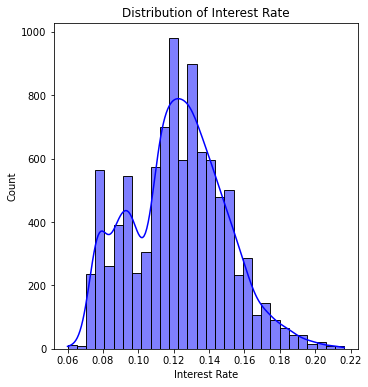

In [18]:
# Visualize the distribution of 'int.rate' and 'fico'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['int.rate'], bins=30, kde=True, color='blue')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')

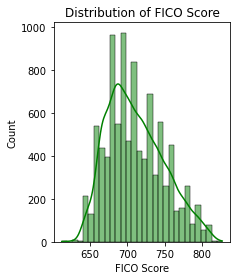

In [21]:
plt.subplot(1, 2, 2)
sns.histplot(data['fico'], bins=30, kde=True, color='green')
plt.title('Distribution of FICO Score')
plt.xlabel('FICO Score')
plt.tight_layout()
plt.show()

##### Data Preprocessing
Now, let's preprocess the data by selecting relevant features and creating a 'label' column:

In [10]:
# Selecting features and creating the label column
selected_features = ['credit.policy', 'int.rate', 'fico']
data['label'] = data['not.fully.paid']  # Assuming 'not.fully.paid' indicates loan denial (1 for denial, 0 for approval)

# Subset the data with selected features and the label
X = data[selected_features]
y = data['label']


##### Data Splitting and Scaling
Next, we split the data into training and testing sets and perform feature scaling:

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Model Training - Random Forest
Now, let's train a Random Forest model and evaluate its performance:

In [13]:
# Train a Random Forest Model
rf_model = RandomForestClassifier(random_state=17)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)

# Print Accuracy and Classification Report
print(f'Random Forest Model - Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Random Forest Model - Accuracy: 0.8063674321503131

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1628
           1       0.23      0.12      0.16       288

    accuracy                           0.81      1916
   macro avg       0.54      0.52      0.52      1916
weighted avg       0.76      0.81      0.78      1916



##### Model Evaluation Summary
Let's summarize the key findings from the model evaluation:

Model Accuracy: 80.64%
Classification Report:
Precision:
Approved Loans (Class 0): 86%

Among the loans predicted as approved, 86% were actually approved.
Denied Loans (Class 1): 23%

For loans predicted as denied, only 23% were correctly predicted.
Recall:
Approved Loans (Class 0): 93%

The model captured 93% of the actual approved loans.
Denied Loans (Class 1): 12%

Unfortunately, the model only identified 12% of the actual denied loans.
F1-Score:
Class 0 (Approved Loans): 89%

An F1-score of 89% suggests a good balance between precision and recall for approved loans.
Class 1 (Denied Loans): 16%

The F1-score for denied loans is lower, indicating room for improvement in identifying denied loans.
Conclusion
In conclusion, our model demonstrates a solid overall accuracy of 80.64%. While the identification of approved loans (Class 0) is strong, there's an opportunity to improve the identification of denied loans (Class 1) for enhanced risk management. As we iterate and refine our model, we aim to achieve a better balance between precision and recall, ensuring a more robust decision-making process in small business loan assessments.

By leveraging AI and ML, banks can streamline loan evaluation processes, reduce manual efforts, and make data-driven decisions that contribute to the efficiency and accuracy of loan approvals. This represents a significant step forward in the digital transformation of the banking sector.